# Hyperparameter Optimization

For this exercise, we will have a look at Hyperparameter Optimization --
instead of just choosing the best type of machine learning model, we also want
to choose the best hyperparameter setting for a task. The end result (i.e. the
predictive performance) is again not important; how you get there is.

Your deliverable will be a report, written in a style that it
would be suitable for inclusion in an academic paper as the "Experimental
Setup" section or similar. If unsure, check an academic paper of your choice,
for example [this one](https://www.eecs.uwyo.edu/~larsko/papers/pulatov_opening_2022-1.pdf). The
level of detail should be higher than in a typical academic paper though. Your
report should be at most five pages, including references and figures but
excluding appendices. It should have the following structure:
- Introduction: What problem are you solving, how are you going to solve it.
- Dataset Description: Describe the data you're using, e.g. how many features and observations, what are you predicting, any missing values, etc.
- Experimental Setup: What specifically are you doing to solve the problem, i.e.\ what programming languages and libraries, how are you processing the data, what machine learning algorithms are you considering and what hyperparameters and value ranges, what measures you are using to evaluate them, what hyperparameter optimization method you chose, etc.
- Results: Description of what you observed, including plots. Compare
  performance before and after tuning, and show the best configuration.
- Code: Add the code you've used as a separate file.

Your report must contain enough detail to reproduce what you did without the
code. If in doubt, include more detail.

There is no required format for the report. You could, for example, use an
iPython notebook.

## Data and Setup

We will have a look at the [Wine Quality
dataset](https://archive-beta.ics.uci.edu/dataset/186/wine+quality). Choose the
one that corresponds to your preference in wine. You may also use a dataset of
your choice, for example one that's relevant to your research.

Choose a small number of different machine learning algorithms and
hyperparameters, along with value ranges, for each. You can use implementations
of AutoML systems (e.g. auto-sklearn), scientific papers, or the documentation
of the library you are using to determine the hyperparameters to tune and the
value ranges. Note that there is not only a single way to do this, but define a
reasonable space (e.g. don't include whether to turn on debug output, or random
forests with 1,000,000 trees, or tune the loss function). Your hyperparameter
search space should be so large that you cannot simply run a grid search.

Determine the best machine learning algorithm and hyperparameter setting for
your dataset. Make sure to optimize both the type of machine learning algorithm
and the hyperparameters at the same time (do not first choose the best ML
algorithm and then optimize its hyperparameters). Choose a suitable
hyperparameter optimizer; you could also use several and e.g. compare the
results achieved by random search and Bayesian optimization. Make sure that the
way you evaluate model performance avoids bias and overfitting. You could use
statistical tests to make this determination.

## Submission

Add your report and code to this repository. Bonus points if you can set up a
Github action to automatically run the code and generate the report!

## Useful Resources :
- "*Basics of HPO - Example and Practical Hints*" -From the AutoML Course Videos
- https://www.youtube.com/watch?v=Gol_qOgRqfA
- https://www.youtube.com/watch?v=0wUF_Ov8b0A&t=1058s

## Importing the Dataset as a Pandas Dataframe

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
red_wine_df = pd.read_csv('winequality-red.csv', delimiter=';')

In [ ]:
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
X = red_wine_df.iloc[:, :-1]
y = red_wine_df['quality']

X.shape, y.shape

((1599, 11), (1599,))

## Importing our Models (Logistic Regression)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(solver='liblinear')

In [ ]:
logistic_regression_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## Helpful Data Scaling for Faster Convergence

In [ ]:
# Due to some speed issues and after googling the issue...
# Some resources suggest scaling the data, so...
# Carry out important pre-processing for SVC :

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

## Hyperparameter Optimization

Methods Used :
- (BOHB) Bayesian Optimization with Hyper Band
- Bayesian Optimization

### (BOHB) Bayesian Optimization with Hyper Band

In [ ]:
# Comment out this line to download required package for the HPO method:
!pip install hpbandster-sklearn

In [ ]:
from hpbandster_sklearn import HpBandSterSearchCV
import ConfigSpace as CS
import ConfigSpace.hyperparameters as CSH

# Construct the hyperparameter distribution:

lbfgs_hpo_distribution = {
    "penalty" : CS.Categorical("penalty", ["l2", "None"]),
    "C" : CS.Float("C", bounds=(0.1, 1000)),
    "solver" : CS.Categorical("solver", ["lbfgs"]),
    "max_iter" : CS.Integer("max_iter", bounds=(1000, 5000)),
}

liblinear_hpo_distribution = {
    "penalty" : CS.Categorical("penalty", ["l1", "l2"]),
    "C" : CS.Float("C", bounds=(0.1, 1000)),
    "solver" : CS.Categorical("solver", ["liblinear"]),
    "max_iter" : CS.Integer("max_iter", bounds=(1000, 5000)),
}

newtoncg_hpo_distribution = {
    "penalty" : CS.Categorical("penalty", ["l2", "None"]),
    "C" : CS.Float("C", bounds=(0.1, 1000)),
    "solver" : CS.Categorical("solver", ["newton-cg"]),
    "max_iter" : CS.Integer("max_iter", bounds=(1000, 5000)),
}

newtoncholesky_hpo_distribution = {
    "penalty" : CS.Categorical("penalty", ["l2", "None"]),
    "C" : CS.Float("C", bounds=(0.1, 1000)),
    "solver" : CS.Categorical("solver", ["newton-cholesky"]),
    "max_iter" : CS.Integer("max_iter", bounds=(1000, 5000)),
}

sag_hpo_distribution = {
    "penalty" : CS.Categorical("penalty", ["l2", "None"]),
    "C" : CS.Float("C", bounds=(0.1, 1000)),
    "solver" : CS.Categorical("solver", ["sag"]),
    "max_iter" : CS.Integer("max_iter", bounds=(1000, 5000)),
}

saga_hpo_distribution = {
    "penalty" : CS.Categorical("penalty", ["l1", "l2", "elasticnet", "None"]),
    "C" : CS.Float("C", bounds=(0.1, 1000)),
    "solver" : CS.Categorical("solver", ["saga"]),
    "max_iter" : CS.Integer("max_iter", bounds=(1000, 5000)),
}

In [ ]:
lbfgs_param_distributions = CS.ConfigurationSpace(
    space = lbfgs_hpo_distribution,
)

liblinear_param_distributions = CS.ConfigurationSpace(
    space = liblinear_hpo_distribution,
)

newtoncg_param_distributions = CS.ConfigurationSpace(
    space = newtoncg_hpo_distribution,
)

newtoncholesky_param_distributions = CS.ConfigurationSpace(
    space = newtoncholesky_hpo_distribution,
)

sag_param_distributions = CS.ConfigurationSpace(
    space = sag_hpo_distribution,
)

saga_param_distributions = CS.ConfigurationSpace(
    space = saga_hpo_distribution,
)

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

inner_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=90)
outer_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=90)

ITERATIONS = 5

searches = []

lbfgs_bohb_search = HpBandSterSearchCV(
    logistic_regression_model,
    lbfgs_param_distributions,
    scoring='accuracy',
    cv=inner_folds,
    optimizer='bohb',
    n_jobs=1,
    n_iter=ITERATIONS,
    verbose=1,
)

searches.append(lbfgs_bohb_search)

liblinear_bohb_search = HpBandSterSearchCV(
    logistic_regression_model,
    liblinear_param_distributions,
    scoring='accuracy',
    cv=inner_folds,
    optimizer='bohb',
    n_jobs=1,
    n_iter=ITERATIONS,
    verbose=1,
)

searches.append(liblinear_bohb_search)

newtoncg_bohb_search = HpBandSterSearchCV(
    logistic_regression_model,
    newtoncg_param_distributions,
    scoring='accuracy',
    cv=inner_folds,
    optimizer='bohb',
    n_jobs=1,
    n_iter=ITERATIONS,
    verbose=1,
)

searches.append(newtoncg_bohb_search)

newtoncholesky_bohb_search = HpBandSterSearchCV(
    logistic_regression_model,
    newtoncholesky_param_distributions,
    scoring='accuracy',
    cv=inner_folds,
    optimizer='bohb',
    n_jobs=1,
    n_iter=ITERATIONS,
    verbose=1,
)

searches.append(newtoncholesky_bohb_search)

sag_bohb_search = HpBandSterSearchCV(
    logistic_regression_model,
    sag_param_distributions,
    scoring='accuracy',
    cv=inner_folds,
    optimizer='bohb',
    n_jobs=1,
    n_iter=ITERATIONS,
    verbose=1,
)

searches.append(sag_bohb_search)

saga_bohb_search = HpBandSterSearchCV(
    logistic_regression_model,
    saga_param_distributions,
    scoring='accuracy',
    cv=inner_folds,
    optimizer='bohb',
    n_jobs=1,
    n_iter=ITERATIONS,
    verbose=1,
)

searches.append(saga_bohb_search)

In [ ]:
best_configurations = []
best_scores = []

for train_index, test_index in outer_fold.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Inner fold Hyper-parameter Optimization
    lbfgs_bohb_search.fit(X_scaled, y)
    liblinear_bohb_search.fit(X_scaled, y)
    newtoncg_bohb_search.fit(X_scaled, y)
    newtoncholesky_bohb_search.fit(X_scaled, y)
    sag_bohb_search.fit(X_scaled, y)
    saga_bohb_search.fit(X_scaled, y)

    print("********************************")
    print(f'SCORES')
    print(lbfgs_bohb_search.best_score_)
    print(liblinear_bohb_search.best_score_)
    print(newtoncg_bohb_search.best_score_)
    print(newtoncholesky_bohb_search.best_score_)
    print(sag_bohb_search.best_score_)
    print(saga_bohb_search.best_score_)
    print("********************************")


    # For this specific fold, get the best model hyperparameters out of the 6 searches:
    best_search = None
    best_hpo_score = 0

    for search in searches:
        if search.best_score_ > best_hpo_score:
            best_hpo_score = search.best_score_
            best_search = search

    print("********************************")
    print(f'BEST SCORE : {best_hpo_score}')
    print("********************************")

    # Outer fold model evaluation
    best_model = best_search.best_estimator_
    best_model.fit(X_train, y_train)

    score = best_model.score(X_test, y_test)

    best_scores.append(score)
    best_configurations.append({
        "hyper-parameters" : best_search.best_params_,
        "performance_estimate" : score
    })

WORKER: start listening for jobs
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: start listening for jobs
HBMASTER: adjusted queue size to (0, 1)
INFO:hpbandster_sklearn.HpBandSterSearchCV:HBMASTER: adjusted queue size to (0, 1)
HBMASTER: starting run at 1711455054.0579295
INFO:hpbandster_sklearn.HpBandSterSearchCV:HBMASTER: starting run at 1711455054.0579295
WORKER: start processing job (0, 0, 0)
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: start processing job (0, 0, 0)
WORKER: registered result for job (0, 0, 0) with dispatcher
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: registered result for job (0, 0, 0) with dispatcher
WORKER: start processing job (0, 0, 1)
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: start processing job (0, 0, 1)
WORKER: registered result for job (0, 0, 1) with dispatcher
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: registered result for job (0, 0, 1) with dispatcher
WORKER: start processing job (0, 0, 2)
INFO:hpbandster_sklearn.HpBa

********************************
SCORES
0.5941163793103448
0.5909952978056425
0.5966183385579937
0.5909952978056425
0.5978702978056425
0.5941163793103448
********************************
********************************
BEST SCORE : 0.5978702978056425
********************************


WORKER: start listening for jobs
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: start listening for jobs
HBMASTER: adjusted queue size to (0, 1)
INFO:hpbandster_sklearn.HpBandSterSearchCV:HBMASTER: adjusted queue size to (0, 1)
HBMASTER: starting run at 1711455167.9409146
INFO:hpbandster_sklearn.HpBandSterSearchCV:HBMASTER: starting run at 1711455167.9409146
WORKER: start processing job (0, 0, 0)
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: start processing job (0, 0, 0)
WORKER: registered result for job (0, 0, 0) with dispatcher
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: registered result for job (0, 0, 0) with dispatcher
WORKER: start processing job (0, 0, 1)
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: start processing job (0, 0, 1)
WORKER: registered result for job (0, 0, 1) with dispatcher
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: registered result for job (0, 0, 1) with dispatcher
WORKER: start processing job (0, 0, 2)
INFO:hpbandster_sklearn.HpBa

********************************
SCORES
0.5959933385579937
0.5909952978056425
0.5959933385579937
0.5909952978056425
0.5941163793103448
0.5941163793103448
********************************
********************************
BEST SCORE : 0.5959933385579937
********************************


WORKER: start listening for jobs
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: start listening for jobs
HBMASTER: adjusted queue size to (0, 1)
INFO:hpbandster_sklearn.HpBandSterSearchCV:HBMASTER: adjusted queue size to (0, 1)
HBMASTER: starting run at 1711455260.3520257
INFO:hpbandster_sklearn.HpBandSterSearchCV:HBMASTER: starting run at 1711455260.3520257
WORKER: start processing job (0, 0, 0)
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: start processing job (0, 0, 0)
WORKER: registered result for job (0, 0, 0) with dispatcher
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: registered result for job (0, 0, 0) with dispatcher
WORKER: start processing job (0, 0, 1)
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: start processing job (0, 0, 1)
WORKER: registered result for job (0, 0, 1) with dispatcher
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: registered result for job (0, 0, 1) with dispatcher
WORKER: start processing job (0, 0, 2)
INFO:hpbandster_sklearn.HpBa

********************************
SCORES
0.5941163793103448
0.5909952978056425
0.5959933385579937
0.5909952978056425
0.5959933385579937
0.5941163793103448
********************************
********************************
BEST SCORE : 0.5959933385579937
********************************


WORKER: start listening for jobs
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: start listening for jobs
HBMASTER: adjusted queue size to (0, 1)
INFO:hpbandster_sklearn.HpBandSterSearchCV:HBMASTER: adjusted queue size to (0, 1)
HBMASTER: starting run at 1711455358.9199858
INFO:hpbandster_sklearn.HpBandSterSearchCV:HBMASTER: starting run at 1711455358.9199858
WORKER: start processing job (0, 0, 0)
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: start processing job (0, 0, 0)
WORKER: registered result for job (0, 0, 0) with dispatcher
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: registered result for job (0, 0, 0) with dispatcher
WORKER: start processing job (0, 0, 1)
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: start processing job (0, 0, 1)
WORKER: registered result for job (0, 0, 1) with dispatcher
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: registered result for job (0, 0, 1) with dispatcher
WORKER: start processing job (0, 0, 2)
INFO:hpbandster_sklearn.HpBa

********************************
SCORES
0.5947433385579937
0.5909952978056425
0.5966183385579937
0.5909952978056425
0.5941163793103448
0.5941163793103448
********************************
********************************
BEST SCORE : 0.5966183385579937
********************************


WORKER: start listening for jobs
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: start listening for jobs
HBMASTER: adjusted queue size to (0, 1)
INFO:hpbandster_sklearn.HpBandSterSearchCV:HBMASTER: adjusted queue size to (0, 1)
HBMASTER: starting run at 1711455454.6451797
INFO:hpbandster_sklearn.HpBandSterSearchCV:HBMASTER: starting run at 1711455454.6451797
WORKER: start processing job (0, 0, 0)
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: start processing job (0, 0, 0)
WORKER: registered result for job (0, 0, 0) with dispatcher
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: registered result for job (0, 0, 0) with dispatcher
WORKER: start processing job (0, 0, 1)
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: start processing job (0, 0, 1)
WORKER: registered result for job (0, 0, 1) with dispatcher
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: registered result for job (0, 0, 1) with dispatcher
WORKER: start processing job (0, 0, 2)
INFO:hpbandster_sklearn.HpBa

********************************
SCORES
0.5947433385579937
0.5909952978056425
0.5959933385579937
0.5909952978056425
0.5953683385579936
0.5941163793103448
********************************
********************************
BEST SCORE : 0.5959933385579937
********************************


WORKER: start listening for jobs
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: start listening for jobs
HBMASTER: starting run at 1711455550.4696524
INFO:hpbandster_sklearn.HpBandSterSearchCV:HBMASTER: starting run at 1711455550.4696524
HBMASTER: adjusted queue size to (0, 1)
INFO:hpbandster_sklearn.HpBandSterSearchCV:HBMASTER: adjusted queue size to (0, 1)
WORKER: start processing job (0, 0, 0)
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: start processing job (0, 0, 0)
WORKER: registered result for job (0, 0, 0) with dispatcher
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: registered result for job (0, 0, 0) with dispatcher
WORKER: start processing job (0, 0, 1)
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: start processing job (0, 0, 1)
WORKER: registered result for job (0, 0, 1) with dispatcher
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: registered result for job (0, 0, 1) with dispatcher
WORKER: start processing job (0, 0, 2)
INFO:hpbandster_sklearn.HpBa

********************************
SCORES
0.5984952978056426
0.5909952978056425
0.5941163793103448
0.5909952978056425
0.5959933385579937
0.5941163793103448
********************************
********************************
BEST SCORE : 0.5984952978056426
********************************


WORKER: start listening for jobs
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: start listening for jobs
HBMASTER: adjusted queue size to (0, 1)
INFO:hpbandster_sklearn.HpBandSterSearchCV:HBMASTER: adjusted queue size to (0, 1)
HBMASTER: starting run at 1711455645.4503584
INFO:hpbandster_sklearn.HpBandSterSearchCV:HBMASTER: starting run at 1711455645.4503584
WORKER: start processing job (0, 0, 0)
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: start processing job (0, 0, 0)
WORKER: registered result for job (0, 0, 0) with dispatcher
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: registered result for job (0, 0, 0) with dispatcher
WORKER: start processing job (0, 0, 1)
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: start processing job (0, 0, 1)
WORKER: registered result for job (0, 0, 1) with dispatcher
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: registered result for job (0, 0, 1) with dispatcher
WORKER: start processing job (0, 0, 2)
INFO:hpbandster_sklearn.HpBa

********************************
SCORES
0.5947413793103448
0.5909952978056425
0.5941163793103448
0.5909952978056425
0.5941163793103448
0.5941163793103448
********************************
********************************
BEST SCORE : 0.5947413793103448
********************************


WORKER: start listening for jobs
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: start listening for jobs
HBMASTER: adjusted queue size to (0, 1)
INFO:hpbandster_sklearn.HpBandSterSearchCV:HBMASTER: adjusted queue size to (0, 1)
HBMASTER: starting run at 1711455739.3361657
INFO:hpbandster_sklearn.HpBandSterSearchCV:HBMASTER: starting run at 1711455739.3361657
WORKER: start processing job (0, 0, 0)
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: start processing job (0, 0, 0)
WORKER: registered result for job (0, 0, 0) with dispatcher
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: registered result for job (0, 0, 0) with dispatcher
WORKER: start processing job (0, 0, 1)
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: start processing job (0, 0, 1)
WORKER: registered result for job (0, 0, 1) with dispatcher
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: registered result for job (0, 0, 1) with dispatcher
WORKER: start processing job (0, 0, 2)
INFO:hpbandster_sklearn.HpBa

********************************
SCORES
0.5941163793103448
0.5909952978056425
0.5953683385579936
0.5909952978056425
0.5941163793103448
0.5941163793103448
********************************
********************************
BEST SCORE : 0.5953683385579936
********************************


WORKER: start listening for jobs
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: start listening for jobs
HBMASTER: adjusted queue size to (0, 1)
INFO:hpbandster_sklearn.HpBandSterSearchCV:HBMASTER: adjusted queue size to (0, 1)
HBMASTER: starting run at 1711455839.0088065
INFO:hpbandster_sklearn.HpBandSterSearchCV:HBMASTER: starting run at 1711455839.0088065
WORKER: start processing job (0, 0, 0)
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: start processing job (0, 0, 0)
WORKER: registered result for job (0, 0, 0) with dispatcher
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: registered result for job (0, 0, 0) with dispatcher
WORKER: start processing job (0, 0, 1)
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: start processing job (0, 0, 1)
WORKER: registered result for job (0, 0, 1) with dispatcher
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: registered result for job (0, 0, 1) with dispatcher
WORKER: start processing job (0, 0, 2)
INFO:hpbandster_sklearn.HpBa

********************************
SCORES
0.5947433385579937
0.5909952978056425
0.5953683385579936
0.5909952978056425
0.5941163793103448
0.5941163793103448
********************************
********************************
BEST SCORE : 0.5953683385579936
********************************


WORKER: start listening for jobs
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: start listening for jobs
HBMASTER: adjusted queue size to (0, 1)
INFO:hpbandster_sklearn.HpBandSterSearchCV:HBMASTER: adjusted queue size to (0, 1)
HBMASTER: starting run at 1711455935.1963038
INFO:hpbandster_sklearn.HpBandSterSearchCV:HBMASTER: starting run at 1711455935.1963038
WORKER: start processing job (0, 0, 0)
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: start processing job (0, 0, 0)
WORKER: registered result for job (0, 0, 0) with dispatcher
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: registered result for job (0, 0, 0) with dispatcher
WORKER: start processing job (0, 0, 1)
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: start processing job (0, 0, 1)
WORKER: registered result for job (0, 0, 1) with dispatcher
INFO:hpbandster_sklearn.HpBandSterSearchCV:WORKER: registered result for job (0, 0, 1) with dispatcher
WORKER: start processing job (0, 0, 2)
INFO:hpbandster_sklearn.HpBa

********************************
SCORES
0.5953683385579936
0.5909952978056425
0.5941163793103448
0.5909952978056425
0.5941163793103448
0.5941163793103448
********************************
********************************
BEST SCORE : 0.5953683385579936
********************************


In [ ]:
best_configurations

[{'hyper-parameters': {'C': 0.5723727556236676,
   'max_iter': 3350,
   'penalty': 'l2',
   'solver': 'sag'},
  'performance_estimate': 0.58125},
 {'hyper-parameters': {'C': 2.2592757758483324,
   'max_iter': 2288,
   'penalty': 'l2',
   'solver': 'lbfgs'},
  'performance_estimate': 0.70625},
 {'hyper-parameters': {'C': 1.9608299790330894,
   'max_iter': 4267,
   'penalty': 'l2',
   'solver': 'newton-cg'},
  'performance_estimate': 0.59375},
 {'hyper-parameters': {'C': 1.071859137921269,
   'max_iter': 2641,
   'penalty': 'l2',
   'solver': 'newton-cg'},
  'performance_estimate': 0.55625},
 {'hyper-parameters': {'C': 2.2604550788924453,
   'max_iter': 1301,
   'penalty': 'l2',
   'solver': 'newton-cg'},
  'performance_estimate': 0.58125},
 {'hyper-parameters': {'C': 0.23996199585724962,
   'max_iter': 4834,
   'penalty': 'l2',
   'solver': 'lbfgs'},
  'performance_estimate': 0.54375},
 {'hyper-parameters': {'C': 8.962140245230126,
   'max_iter': 4285,
   'penalty': 'l2',
   'solver': '

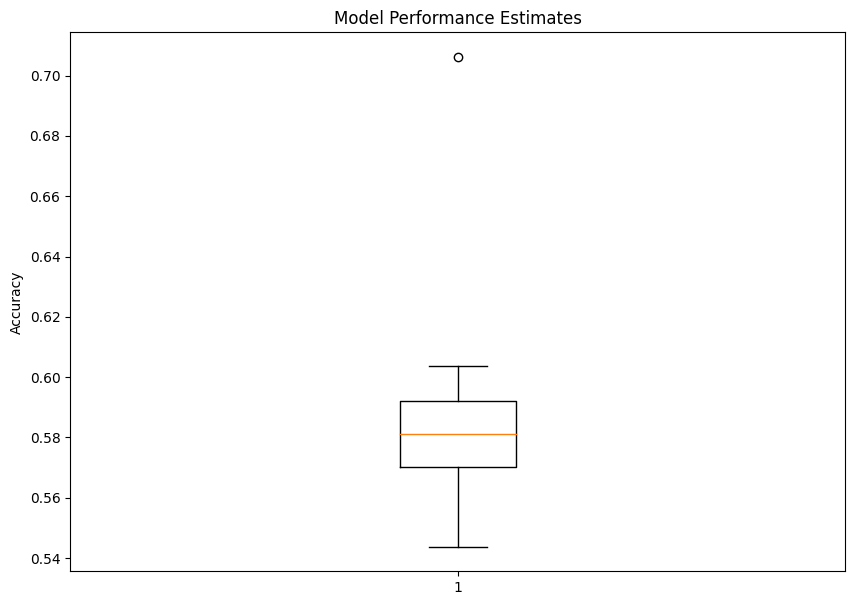

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(10, 7))

plt.boxplot(best_scores)

plt.title("Model Performance Estimates")

plt.ylabel("Accuracy")

plt.show()

In [ ]:
np.array(best_scores).mean()

0.589752358490566

### Bayesian Optimization

In [ ]:
# Comment out this line to install the necessary library for Bayesian Optimization:
!pip install baytune

In [ ]:
models = {
    'LR_LBFGS': LogisticRegression,
    'LR_LIBLINEAR': LogisticRegression,
    'LR_NEWTONCG': LogisticRegression,
    'LR_NEWTONCHOLESKY': LogisticRegression,
    'LR_SAG': LogisticRegression,
    'LR_SAGA': LogisticRegression,
}

In [ ]:
from baytune.tuning import Tunable
from baytune.tuning import hyperparams as hp

tunables = {
    'LR_LBFGS': Tunable({
        'penalty': hp.CategoricalHyperParam(["l2", None]),
        'C': hp.FloatHyperParam(min=0.1, max=1000),
        'solver': hp.CategoricalHyperParam(["lbfgs"]),
        'max_iter' : hp.IntHyperParam(min=1000, max=5000),
    }),
    'LR_LIBLINEAR': Tunable({
        'penalty': hp.CategoricalHyperParam(["l1", "l2"]),
        'C': hp.FloatHyperParam(min=0.1, max=1000),
        'solver': hp.CategoricalHyperParam(["liblinear"]),
        'max_iter' : hp.IntHyperParam(min=1000, max=5000),
    }),
    'LR_NEWTONCG': Tunable({
        'penalty': hp.CategoricalHyperParam(["l2", None]),
        'C': hp.FloatHyperParam(min=0.1, max=1000),
        'solver': hp.CategoricalHyperParam(["newton-cg"]),
        'max_iter' : hp.IntHyperParam(min=1000, max=5000),
    }),
    'LR_NEWTONCHOLESKY': Tunable({
        'penalty': hp.CategoricalHyperParam(["l2", None]),
        'C': hp.FloatHyperParam(min=0.1, max=1000),
        'solver': hp.CategoricalHyperParam(["newton-cholesky"]),
        'max_iter' : hp.IntHyperParam(min=1000, max=5000),
    }),
    'LR_SAG': Tunable({
        'penalty': hp.CategoricalHyperParam(["l2", None]),
        'C': hp.FloatHyperParam(min=0.1, max=1000),
        'solver': hp.CategoricalHyperParam(["sag"]),
        'max_iter' : hp.IntHyperParam(min=1000, max=5000),
    }),
    'LR_SAGA': Tunable({
        'penalty': hp.CategoricalHyperParam(["l1", "l2", "elasticnet", None]),
        'C': hp.FloatHyperParam(min=0.1, max=1000),
        'solver': hp.CategoricalHyperParam(["saga"]),
        'max_iter' : hp.IntHyperParam(min=1000, max=5000),
    }),
}

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from baytune import BTBSession

inner_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=90)
outer_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=90)
best_configurations = []
best_scores = []

for train_index, test_index in outer_fold.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    def scoring_function(model_name, hyperparameter_values):
        model_class = models[model_name]
        model_instance = model_class(**hyperparameter_values)
        scores = cross_val_score(
            cv=inner_fold,
            estimator=model_instance,
            X=X_train,
            y=y_train,
            scoring='accuracy',
        )

        return scores.mean()

    session = BTBSession(
        tunables=tunables,
        scorer=scoring_function,
        verbose=True,
    )

    best_result = session.run(30)

    best_model_name = best_result['name']
    hyperparameters = best_result['config']
    best_model_class = models[best_model_name]
    model_instance = best_model_class(**hyperparameters)

    model_instance.fit(X_train, y_train)

    score = model_instance.score(X_test, y_test)

    best_scores.append(score)
    best_configurations.append({
        "hyper-parameters" : hyperparameters,
        "performance_estimate" : score
    })

  0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and

  0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and

  0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

  0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C

  0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

  0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and

  0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and

  0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

  0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and

  0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C

In [ ]:
for configuration in best_configurations:
  print(configuration)
  print("****************************************************")
  print("****************************************************")

{'hyper-parameters': {'penalty': 'l2', 'C': 0.1, 'solver': 'lbfgs', 'max_iter': 1000}, 'performance_estimate': 0.58125}
****************************************************
****************************************************
{'hyper-parameters': {'penalty': None, 'C': 325.40491368886734, 'solver': 'lbfgs', 'max_iter': 1137}, 'performance_estimate': 0.70625}
****************************************************
****************************************************
{'hyper-parameters': {'penalty': 'l2', 'C': 0.1, 'solver': 'lbfgs', 'max_iter': 1000}, 'performance_estimate': 0.59375}
****************************************************
****************************************************
{'hyper-parameters': {'penalty': 'l2', 'C': 0.1, 'solver': 'lbfgs', 'max_iter': 1000}, 'performance_estimate': 0.55625}
****************************************************
****************************************************
{'hyper-parameters': {'penalty': 'l2', 'C': 0.1, 'solver': 'lbfgs', 'max_iter': 1

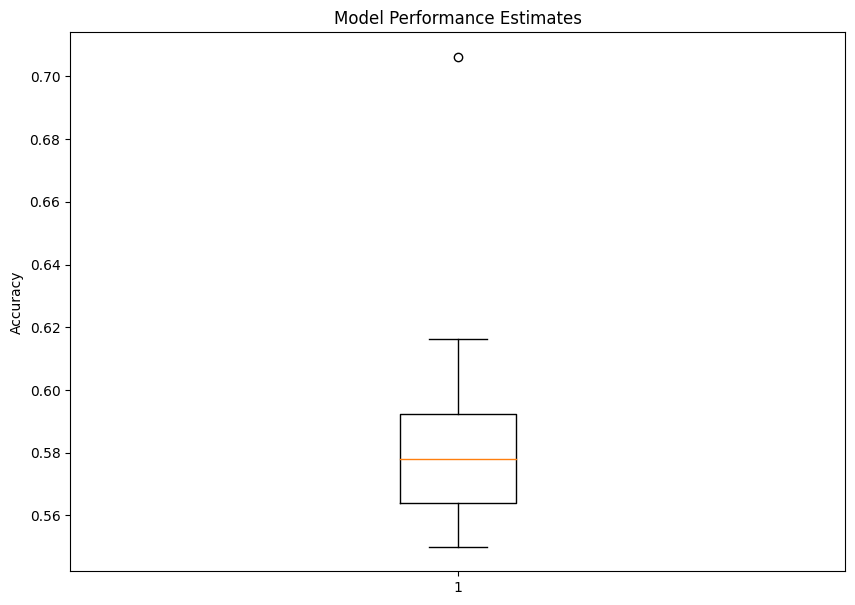

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(10, 7))

plt.boxplot(best_scores)

plt.title("Model Performance Estimates")

plt.ylabel("Accuracy")

plt.show()

In [ ]:
np.array(best_scores).mean()

0.5897602201257862